In [17]:
#%pip install numpy==1.23.5

In [18]:
#import numpy as np

In [19]:
#pip show numpy

In [20]:
#import numpy as np
#print("OpenCV version:", np.__version__)

In [21]:
#import cv2
#print("OpenCV version:", cv2.__version__)


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
#Cargamos la imagen de un jugador que hemos guardado anteriormente
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

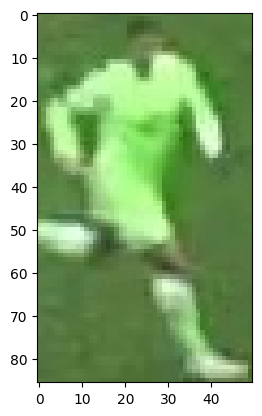

In [11]:
#Visualizamos la imagen
plt.imshow(image)
plt.show()

# Toma la mitad superior de la imagen

Porque la camiseta siempre se encontrará en la parte superior de la imagen.

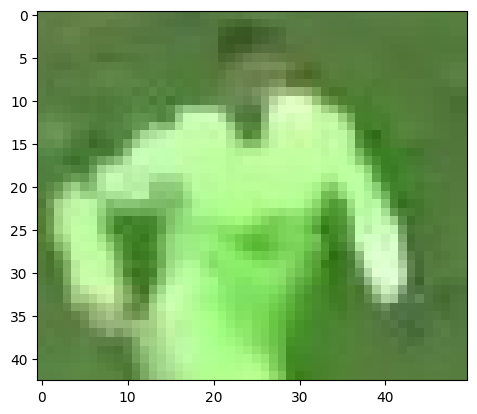

In [12]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

Per així diferenciar el color de la samarreta amb el color del fons (que normalment serà verd perquè serà la gespa).

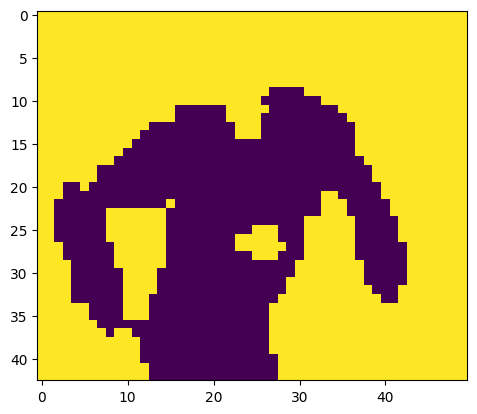

In [22]:
# Reconfigura la imagen en una matriz 2D
image_2d = top_half_image.reshape(-1, 3)

# Realiza el clustering k-means con 2 grupos
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Obtén las etiquetas de los grupos
labels = kmeans.labels_

# Reconfigura las etiquetas en la forma original de la imagen
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Muestra la imagen agrupada
plt.imshow(clustered_image)
plt.show()

De esta manera, tendremos solo dos colores, donde un color será el de la camiseta y el otro el del fondo.

A continuación se calculará el clúster para las 4 esquinas (que normalmente será el clúster diferente al del jugador).

In [14]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


Vemos que las esquinas pertenecen al clúster 1 y, por lo tanto, el jugador (el color morado) pertenecerá al clúster 0.

In [15]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


Ahora calculamos el color del centro del clúster del jugador.

In [16]:
kmeans.cluster_centers_[player_cluster]

array([171.12121212, 235.28853755, 142.77865613])